# Initial research questions

* comparative analysis of gender representation in artwork creation between born digital and analogue art collections
* with also, potentially, some details on medium, location…
* semantic analysis of the narrative about the artworks or what are the keywords associated with different artwork types

### The story could be:
The internet was supposed to revolutionize things, so how did it do when looking at who makes art and who gets included in collections?


A simple way to plan your work is:

 * choose the research question
 * map the question to pieces of information needed to answer the question (e.g. periods, countings)
 * map the data to specific data types (categorical, numerical, ordinal)
 * choose the plot(s) that better help you to visualise some pattern (e.g. a bar chart)
 * get your data in some form (SPARQL query results)
 * filter/ manipulate your data (select the variables that matter, make operations like countings) 
 * create a data structure that fits the plotting requirements (a table, a JSON etc) including the number of variables needed (e.g. one categorical and one numerical)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
#IMPORT DATASETS
artists = pd.read_pickle('MOMA_data/pickle/MoMAartists.pkl')
before80 = pd.read_pickle('MOMA_data/pickle/old_artworks.pkl')
after80 = pd.read_pickle('MOMA_data/pickle/new_artworks.pkl')
rhizome = pd.read_pickle('Rhizome_data/rhizome_artworks_extra.pkl')



In [153]:
to_clean = before80[before80.ID.str.contains(',', regex= True, na=False)]
len(to_clean)

4466

In [154]:
to_clean = after80[after80.ID.str.contains(',', regex= True, na=False)]
len(to_clean)

2647

In [156]:
len(before80), len(after80), len(rhizome)


(100692, 34154, 2270)

### Further cleaning

In order to aviod mistakes when an artwork has multiple authors, I decided to divide them into new rows, obtaining a new dataframe having all rows corresponding to an artist. 

In [46]:
def remake_df(df):

    cols = df.columns
    to_clean = df[df.ID.str.contains(',', regex= True, na=False)]

    clean = pd.DataFrame(columns=cols)


    for ind, row in to_clean.iterrows():
        #enter in nationality cell, start counting the irtem loops for indexes
        ids = row.ID.split(', ')
        names = row.Artist.split(', ')
        nationalities = row.Nationality.split(', ')
        genders = row.Gender.split(', ')
        for idx, id in enumerate(ids):
            #make a new row for corresponding artist 
            new_row = row
            #change informations in the cells 
            new_row.ID = id
            new_row.Artist = names[idx]
            new_row.Nationality = nationalities[idx]
            new_row.Gender = genders[idx]
            clean.loc[len(clean)]= new_row
        df = df.drop(ind, axis=0)
    new = df.append(clean)

    return new

In [47]:
before80 =  remake_df(before80)



In [48]:
after80 = remake_df(after80)

In [150]:
after80

,Title,Artist,ID,DateCreated,Medium,Department,DateAcquired,URL,ThumbnailURL,Nationality,Gender,Source
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,1987,Paint and colored pencil on print,Architecture & Design,1995,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,French,M,MOMA
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,missing,M,MOMA
31,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995,http://www.moma.org/collection/works/33,http://www.moma.org/media/W1siZiIsIjIwMCJdLFsi...,missing,M,MOMA
35,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995,http://www.moma.org/collection/works/38,http://www.moma.org/media/W1siZiIsIjI2NyJdLFsi...,missing,M,MOMA
40,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Ink on tracing paper,Architecture & Design,1995,http://www.moma.org/collection/works/44,http://www.moma.org/media/W1siZiIsIjI5NiJdLFsi...,missing,M,MOMA
...,...,...,...,...,...,...,...,...,...,...,...,...
7572,Algae Geographies cup,Studio Klarenbeek & Dros,132113,2019,Microalgae and sugar-based biopolymer,Architecture & Design,2019,missing,missing,Dutch,missing,MOMA
7573,Algae Geographies cup,Atelier Luma/ Luma Arles,131930,2019,Microalgae and sugar-based biopolymer,Architecture & Design,2019,missing,missing,missing,missing,MOMA
7574,Algae Geographies cup,Eric Klarenbeek,132165,2019,Microalgae and sugar-based biopolymer,Architecture & Design,2019,missing,missing,Dutch,M,MOMA
7575,Algae Geographies cup,Maartje Dros,132166,2019,Microalgae and sugar-based biopolymer,Architecture & Design,2019,missing,missing,Dutch,F,MOMA


In [79]:
cols = rhizome.columns
cols

Index(['ID', 'URL', 'Title', 'Artist', 'dateAcquired', 'dateCreated',
       'Nationality', 'Gender'],
      dtype='object')

In [80]:

to_clean = rhizome[rhizome.ID.str.contains(',', regex= True, na=False)]
len(to_clean)

131

In [81]:
clean = pd.DataFrame(columns=cols)

for ind, row in to_clean.iterrows():
    #enter in nationality cell, start counting the irtem loops for indexes
    ids = row.ID.split(', ')
    names = row.Artist.split(', ')
    nationalities = row.Nationality.split(', ')
    genders = row.Gender.split(', ')

    for idx, id in enumerate(ids):
        #make a new row for corresponding artist 
        new_row = row
        #change informations in the cells 
        new_row.ID = id

        #correct problems with names
        if idx != len(names):
            new_row.Artist = 'collective member'
        else:
            new_row.Artist = names[idx-1]
        

        new_row.Nationality = nationalities[idx]
        new_row.Gender = genders[idx]
        clean.loc[len(clean)]= new_row
    rhizome = rhizome.drop(ind, axis=0)

   


In [82]:
len(rhizome), len(clean)

(2139, 294)

In [92]:
rhizome_final = rhizome.append(clean)


In [100]:
rhizome_final = rhizome_final.rename(columns={'dateCreated':'DateCreated', 'dateAcquired':'DateAcquired'})


In [99]:
before80["Source"] = "MOMA"
after80["Source"] = "MOMA"
rhizome_final["Source"] = "RHIZOME"

In [101]:
rhizome_final

,ID,URL,Title,Artist,DateAcquired,DateCreated,Nationality,Gender,Source
0,879,https://artbase.rhizome.org/wiki/Q2423,ZUR FARBENLEHRE (THEORY OF COLOURS),Steven Jones,2007,2007,British,M,RHIZOME
1,1020,https://artbase.rhizome.org/wiki/Q4089,Zones de Convergence,cicero,2005,2005,missing,missing,RHIZOME
3,312,https://artbase.rhizome.org/wiki/Q4374,"Zaira, City of Memories",Gokcen Erguven,2004,2004,Turkish,F,RHIZOME
4,920,https://artbase.rhizome.org/wiki/Q3972,Z_G [zeitgeist gestalten],Tiago Borges,2008,2007,Angolan,M,RHIZOME
5,80,https://artbase.rhizome.org/wiki/Q2580,Z,Antoni Abad,2003,2001,Spanish,M,RHIZOME
...,...,...,...,...,...,...,...,...,...
289,1202,https://artbase.rhizome.org/wiki/Q2916,[V]ote-auction,UBERMORGEN,2001,2000,Austrian,F,RHIZOME
290,1206,https://artbase.rhizome.org/wiki/Q2916,[V]ote-auction,collective member,2001,2000,Swiss/American,M,RHIZOME
291,848,https://artbase.rhizome.org/wiki/Q3721,[murmur],collective member,2004,2003,Canadian,M,RHIZOME
292,300,https://artbase.rhizome.org/wiki/Q3721,[murmur],collective member,2004,2003,Canadian,M,RHIZOME


In [106]:
before80.columns

Index(['Title', 'Artist', 'ID', 'DateCreated', 'Medium', 'Department',
       'DateAcquired', 'URL', 'ThumbnailURL', 'Nationality', 'Gender',
       'Source'],
      dtype='object')

In [122]:
frames = [before80, after80, rhizome_final]
workingDf = pd.concat(frames, ignore_index=True)
workingDf

,Title,Artist,ID,DateCreated,Medium,Department,DateAcquired,URL,ThumbnailURL,Nationality,Gender,Source
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,1896,Ink and cut-and-pasted painted pages on paper,Architecture & Design,1996,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,Austrian,M,MOMA
1,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,1903,"Graphite, pen, color pencil, ink, and gouache ...",Architecture & Design,1997,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,Austrian,M,MOMA
2,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,1903,"Graphite, color pencil, ink, and gouache on tr...",Architecture & Design,1997,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,Austrian,M,MOMA
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1976,Gelatin silver photograph,Architecture & Design,1995,http://www.moma.org/collection/works/7,http://www.moma.org/media/W1siZiIsIjE0OCJdLFsi...,missing,M,MOMA
4,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1976,Gelatin silver photographs,Architecture & Design,1995,http://www.moma.org/collection/works/8,http://www.moma.org/media/W1siZiIsIjE0OSJdLFsi...,missing,M,MOMA
...,...,...,...,...,...,...,...,...,...,...,...,...
152512,[V]ote-auction,UBERMORGEN,1202,2000,NaN,NaN,2001,https://artbase.rhizome.org/wiki/Q2916,NaN,Austrian,F,RHIZOME
152513,[V]ote-auction,collective member,1206,2000,NaN,NaN,2001,https://artbase.rhizome.org/wiki/Q2916,NaN,Swiss/American,M,RHIZOME
152514,[murmur],collective member,848,2003,NaN,NaN,2004,https://artbase.rhizome.org/wiki/Q3721,NaN,Canadian,M,RHIZOME
152515,[murmur],collective member,300,2003,NaN,NaN,2004,https://artbase.rhizome.org/wiki/Q3721,NaN,Canadian,M,RHIZOME


### Questions

**1. artist nationalities over the two databases**

In [128]:
rhizome_nats = len(list(set(workingDf[workingDf.Source == "RHIZOME"].Nationality)))
moma_nats = len(list(set(workingDf[workingDf.Source == "MOMA"].Nationality)))
rhizome_nats, moma_nats

(93, 118)

In [129]:
# create df for plotting nationalities count 
nat_counts = pd.DataFrame({'Institution':['RHIZOME', 'MOMA'], 'Nat count': [rhizome_nats, moma_nats]})
nat_counts

,Institution,Nat count
0,RHIZOME,93
1,MOMA,118


<AxesSubplot:xlabel='Institution', ylabel='Nat count'>

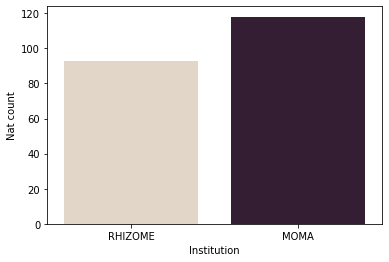

In [133]:
sns.barplot(x="Institution", y="Nat count", palette="ch:.25", data=nat_counts)

how many artists for country?

In [138]:
moma_countries = list(set(workingDf[workingDf.Source == "MOMA"].Nationality))
moma_data = workingDf[workingDf.Source == "MOMA"]
moma_data
for country

,Title,Artist,ID,DateCreated,Medium,Department,DateAcquired,URL,ThumbnailURL,Nationality,Gender,Source
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,1896,Ink and cut-and-pasted painted pages on paper,Architecture & Design,1996,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,Austrian,M,MOMA
1,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,1903,"Graphite, pen, color pencil, ink, and gouache ...",Architecture & Design,1997,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,Austrian,M,MOMA
2,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,1903,"Graphite, color pencil, ink, and gouache on tr...",Architecture & Design,1997,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,Austrian,M,MOMA
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1976,Gelatin silver photograph,Architecture & Design,1995,http://www.moma.org/collection/works/7,http://www.moma.org/media/W1siZiIsIjE0OCJdLFsi...,missing,M,MOMA
4,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1976,Gelatin silver photographs,Architecture & Design,1995,http://www.moma.org/collection/works/8,http://www.moma.org/media/W1siZiIsIjE0OSJdLFsi...,missing,M,MOMA
...,...,...,...,...,...,...,...,...,...,...,...,...
150079,Algae Geographies cup,Studio Klarenbeek & Dros,132113,2019,Microalgae and sugar-based biopolymer,Architecture & Design,2019,missing,missing,Dutch,missing,MOMA
150080,Algae Geographies cup,Atelier Luma/ Luma Arles,131930,2019,Microalgae and sugar-based biopolymer,Architecture & Design,2019,missing,missing,missing,missing,MOMA
150081,Algae Geographies cup,Eric Klarenbeek,132165,2019,Microalgae and sugar-based biopolymer,Architecture & Design,2019,missing,missing,Dutch,M,MOMA
150082,Algae Geographies cup,Maartje Dros,132166,2019,Microalgae and sugar-based biopolymer,Architecture & Design,2019,missing,missing,Dutch,F,MOMA


How many nationalities in the moma artists datasets and the two of the artworks?